# Exploratory data analysis
## Date created: 1 March 2021
### Quick exploration of datasets considered for thesis research.
### Currently contains analyses of: Blog Authorship Corpus

In [1]:
%matplotlib inline

# Import statements
import os # for directory operations
import numpy as np # for numerical/linear algebra methods
import pandas as pd # for data(frame) processing
import pdb # for debudding
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for cool plotting
import re # for regular expression
import nltk # natural language processing toolkit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [2]:
# Get pathname of dataset
for dirname, _, filenames in os.walk("../data/blogs_kaggle"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/blogs_kaggle/.DS_Store
../data/blogs_kaggle/blogtext.csv


In [3]:
# Read and load dataset
data = pd.read_csv("../data/blogs_kaggle/blogtext.csv")

In [4]:
# Quick sample/overview of dataframe structure
data.head(15)
# TODO: Remove non-English texts --> See row 2 --> See DialoGPT paper for tips on filtering out languages

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [5]:
# Check for missing values/NAs in all variables
data.isna().any()

id        False
gender    False
age       False
topic     False
sign      False
date      False
text      False
dtype: bool

In [6]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [7]:
# TODO: comment out this cell when running analyses on full dataset.
# Take subset of data for faster testing
data = data.head(2021)

In [8]:
# Shape (i.e., number of datapoints and variables, respectively) of dataframe
data.shape

(2021, 7)

## Exploratory analysis

In [9]:
data.describe(include = ['object', 'bool'])

,gender,topic,sign,date,text
count,2000,2000,2000,2000,2000
unique,2,16,12,259,1998
top,male,Technology,Aries,"05,August,2004",urlLink resume
freq,1272,607,699,616,2


In [10]:
# Convert all columns (except ID and date) to object type
data['age'] = data['age'].astype(object)

Text(0.5, 1.0, 'Unconditional Age Distribution')

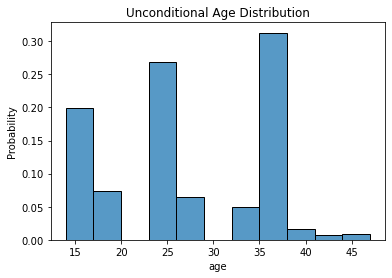

In [14]:
# Age distribution, unconditional
sns.histplot(data, x = "age", binwidth = 3, stat = "probability")
plt.title("Unconditional Age Distribution")

Text(0.5, 1.0, 'Age Distribution, Conditioned On Gender')

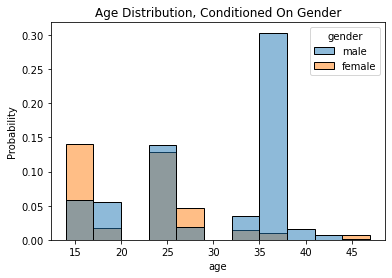

In [13]:
# Age distribution, conditioned on gender
sns.histplot(data, x = "age", hue = "gender", binwidth = 3, stat = "probability")
plt.title("Age Distribution, Conditioned On Gender")

Text(0.5, 1.0, 'Distribution of Astrological Signs')

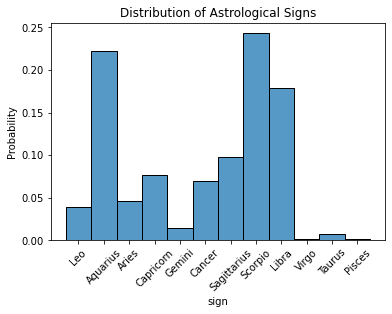

In [13]:
sns.histplot(data, x = 'sign', stat = 'probability')
plt.xticks(rotation=45)
plt.title("Distribution of Astrological Signs")

Text(0.5, 1.0, 'Distribution of Topics')

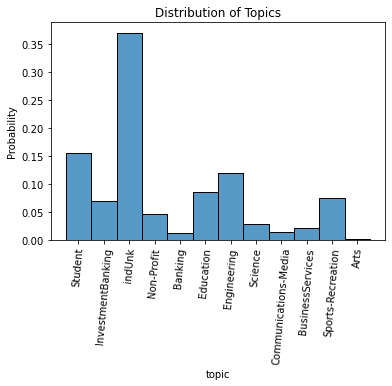

In [14]:
sns.histplot(data, x = 'topic', stat = 'probability')
plt.xticks(rotation=85)
plt.title("Distribution of Topics")

## Data cleaning / preprocessing

In [15]:
# Removing all unwanted text/characters from data['text'] column

# Remove all non-alphabetical characters
data['clean_data'] = data['text'].apply(lambda x: re.sub(r'[^A-Za-z]+',' ', x))

In [16]:
# Make all letters lower case
data['clean_data'] = data['clean_data'].apply(lambda x: x.lower())

In [17]:
# Remove white space from beginning and end of string
data['clean_data'] = data['clean_data'].apply(lambda x: x.strip())

In [18]:
# Remove stop words
stopwords = set(nltk.corpus.stopwords.words('english')) # use set (hash table) data structure for faster lookup
data['clean_data'] = data['clean_data'].apply(lambda x: ' '.join([words for words in x.split() if words not in stopwords]))

In [19]:
# Check difference: before
print(f"Unprocessed data =====> {data['text'][0]}")
print(81 * "=")
# After
print(f"Cleaned data so far =====> {data['clean_data'][0]}")

Unprocessed data =====>            Info has been found (+/- 100 pages, and 4.5 MB of .pdf files) Now i have to wait untill our team leader has processed it and learns html.         
Cleaned data so far =====> info found pages mb pdf files wait untill team leader processed learns html


In [20]:
data['clean_data'][6]

'somehow coca cola way summing things well early flagship jingle like buy world coke tune like teach world sing pretty much summed post woodstock era well add much sales catchy tune korea coke theme urllink stop thinking feel pretty much sums lot korea koreans look relaxed couple stopped thinking started feeling course high regard education math logic deep think many koreans really like work emotion anything else westerners seem sublimate moreso least display different way maybe scratch westerners koreans probably pretty similar context different anyways think losing korea repeat stop thinking feel stop thinking feel stop thinking feel everything alright'

In [21]:
# Drop columns that are uninformative for writing style (i.e., ID and date)
data.drop(['id', 'date'], axis = 1, inplace = True)

In [22]:
# Merge all possibly interesting labels into one column
data['labels'] = data.apply(lambda col: [col['gender'], str(col['age']), col['topic'], col['sign']], axis = 1)

# Only keep age as label
# data['labels'] = data.apply(lambda col: [str(col['age'])], axis = 1) # TODO: Why keep age as string?
data['labels'] = data.apply(lambda col: [col['age']], axis = 1)

In [23]:
data.head()

,gender,age,topic,sign,text,clean_data,labels
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found pages mb pdf files wait untill team...,[15]
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...,[15]
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...,[15]
3,male,15,Student,Leo,testing!!! testing!!!,testing testing,[15]
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoo toolbar capture urls popups means...,[33]


In [24]:
# Reduce dataframe to only contain cleaned blogs and list of labels
data = data[['clean_data', 'labels']]


In [25]:
data.head()

,clean_data,labels
0,info found pages mb pdf files wait untill team...,[15]
1,team members drewes van der laag urllink mail ...,[15]
2,het kader van kernfusie op aarde maak je eigen...,[15]
3,testing testing,[15]
4,thanks yahoo toolbar capture urls popups means...,[33]


## Classification

In [26]:
# Split data into features/ X and labels / Y 
X = data['clean_data']
Y = data['labels']

### Bi-gram and tri-gram models

In [27]:
# bi-gram model?
vectorizer = CountVectorizer(binary = True, ngram_range = (1, 3))

# fit model
X = vectorizer.fit_transform(X)

In [28]:
print(vectorizer.get_feature_names()[:10])

['aa', 'aa anger', 'aa anger management', 'aaa', 'aaa take', 'aaa take ended', 'aaa travel', 'aaa travel helped', 'aaaah', 'aaaah wisdom']


In [29]:
# Get label counts
label_counts = {}

for labels in data.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

In [30]:
label_counts

{15: 74,
 33: 83,
 14: 70,
 25: 57,
 17: 142,
 23: 69,
 37: 19,
 26: 35,
 24: 331,
 27: 85,
 45: 14,
 34: 6,
 41: 14,
 44: 1}

In [31]:
# Binarize the labels for prediction 
binarizer = MultiLabelBinarizer(classes = sorted(label_counts.keys()))

In [32]:
Y = binarizer.fit_transform(data.labels)

In [33]:
label_counts.keys()

dict_keys([15, 33, 14, 25, 17, 23, 37, 26, 24, 27, 45, 34, 41, 44])

In [34]:
# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [35]:
# Fit logistic regression model
model = LogisticRegression(solver = 'lbfgs') #TODO: different solveR?
model = OneVsRestClassifier(model) # TODO: Change this  to multi-class classifier for age cats
model.fit(X_train, Y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [36]:
# make predictions on test set
Y_pred = model.predict(X_test)

In [37]:
Y_pred_inversed = binarizer.inverse_transform(Y_pred)
Y_test_inversed = binarizer.inverse_transform(Y_test)

In [38]:
# Evaluate performance
def print_evaluation_scores(labels, preds):
    print(f"Accuracy: {accuracy_score(labels, preds)}")
    print(f"F1 score: {f1_score(labels, preds, average = 'micro')}")
    print(f"Average precision: {average_precision_score(labels, preds, average = 'micro')}")
    print(f"Average recall: {recall_score(labels, preds, average = 'micro')}")

In [39]:
print_evaluation_scores(Y_test, Y_pred)

Accuracy: 0.21
F1 score: 0.34710743801652894
Average precision: 0.2664285714285714
Average recall: 0.21
